In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import svm, metrics, datasets
from sklearn.model_selection import GridSearchCV, train_test_split

## Reading Data

In [3]:
bankdata = pd.read_csv('bill_authentication.csv')

In [4]:
bankdata.shape

(1372, 5)

In [5]:
bankdata.head(10)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


## Data Preprocessing 

In [6]:
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Training the Algorithm

In [8]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

## Prediction

In [9]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1
 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0]


## Evaluation

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
cmat = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[163   2]
 [  2 108]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       165
           1       0.98      0.98      0.98       110

    accuracy                           0.99       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.99      0.99      0.99       275



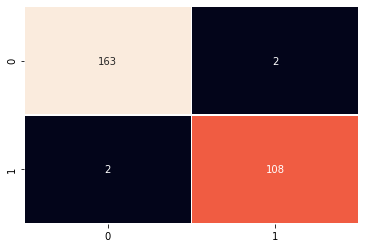

In [25]:
sns.heatmap(cmat,annot=True,fmt="d",linewidth=0.5,cbar=False)